In [47]:
import pandas as pd
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u 
from astropy.table import Table
from astroquery.xmatch import XMatch
import seaborn as sns

In [ ]:
DIR = 'c:\\Users\\gamak\\Documents\\Report RSF\\22.01.NewGrant\\'
tab_ARTXC = pd.read_csv(DIR+'artxc_1year_catalog.csv')

In [9]:
tab_ARTXC.head()

,NAME,RAJ2000,DEJ2000,GLON,GLAT,ELON,ELAT,S/N,Flux,Flux_err_lo,Flux_err_up,EXTENDED,CNAME,OTYPE
0,SRGA J000132.7+240242,0.386127,24.044945,108.549908,-37.429471,10.403881,21.800637,5.3,4.7,2.3,3.1,False,NEW X-RAY SOURCE,BLAZAR?
1,SRGA J000632.2-690029,1.633984,-69.008108,308.868127,-47.599267,314.682734,-59.388865,7.1,5.0,2.0,2.6,False,CTCV J0006-6900,CV
2,SRGA J001124.6-112841,2.852528,-11.478165,90.005232,-71.742518,357.982366,-11.652339,5.3,8.3,2.5,3.0,False,WW Cet,CV
3,SRGA J001315.3+774824,3.313766,77.806583,120.852938,15.089233,62.201978,63.115044,5.3,4.6,1.5,1.8,False,8C 0010+775,BLAZAR?
4,SRGA J001704.0+813451,4.266668,81.580968,121.607804,18.797722,70.103971,64.588735,7.3,3.8,1.4,1.7,False,6C 001403+811827,BLAZAR


In [110]:
col=['RAJ2000','DEJ2000','NAME']
pos_list = tab_ARTXC[col]

In [111]:
tab_ARTXC = tab_ARTXC.sort_values('S/N',ascending=False)
unk = tab_ARTXC.OTYPE == 'UNIDENT'
tab_ARTXC[col][unk].to_csv(DIR+'for_ZTF.csv', index=False, sep=' ')

In [38]:
pos_list.to_csv(DIR+'pos_list.csv',index=False)

In [39]:
table = XMatch.query(cat1=open(DIR+'pos_list.csv'), cat2='vizier:V/139/sdss9',max_distance=20 * u.arcsec, colRA1='RAJ2000', colDec1='DEJ2000')

C:\ProgramData\Anaconda3\envs\Astro\lib\site-packages\astropy\io\ascii\core.py:1069: AstropyWarning: OverflowError converting to IntType in column objID, reverting to String.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\Astro\lib\site-packages\astropy\io\ascii\core.py:1069: AstropyWarning: OverflowError converting to IntType in column SpObjID, reverting to String.
  warnings.warn(


In [48]:
table.colnames

['angDist',
 'RAJ2000',
 'DEJ2000',
 'NAME',
 'SDSS9',
 'RAdeg',
 'DEdeg',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'umag',
 'gmag',
 'rmag',
 'imag',
 'zmag',
 'e_umag',
 'e_gmag',
 'e_rmag',
 'e_imag',
 'e_zmag',
 'objID',
 'cl',
 'q_mode',
 'flags',
 'Q',
 'ObsDate',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'SpObjID',
 'zsp',
 'e_zsp',
 'f_zsp',
 'spType',
 'spCl',
 'subClass']

In [102]:
len(tab_sdss.SpObjID.unique())

42

In [42]:
tab_sdss = table.to_pandas()

In [45]:
tab_merge = pd.merge(tab_sdss,tab_ARTXC,on = ['NAME'])

In [87]:
tab_merge.OTYPE.unique()

array(['CV', 'UNIDENT', 'CLUSTER', 'SEYFERT', 'HMXB', 'MAGNETAR',
       'BLAZAR', 'BLAZAR?', 'AGN', 'LMXB', 'SFR', 'STAR?', 'CV?', 'STAR'],
      dtype=object)

In [91]:
new_col = ['gmag','u-g','u-r','u-i','u-z']#,'g-r','g-i','g-z','r-i','r-z','i-z']

In [81]:
tab_merge['u-g'] = tab_merge.umag - tab_merge.gmag
tab_merge['g-r'] = tab_merge.gmag - tab_merge.rmag
tab_merge['r-i'] = tab_merge.rmag - tab_merge.imag
tab_merge['i-z'] = tab_merge.imag - tab_merge.zmag
tab_merge['u-r'] = tab_merge.umag - tab_merge.rmag
tab_merge['u-i'] = tab_merge.umag - tab_merge.imag
tab_merge['u-z'] = tab_merge.umag - tab_merge.zmag
tab_merge['g-i'] = tab_merge.gmag - tab_merge.imag
tab_merge['g-z'] = tab_merge.gmag - tab_merge.zmag
tab_merge['r-z'] = tab_merge.rmag - tab_merge.zmag

In [98]:
ind = [t for t in range(len(tab_merge.OTYPE)) if (tab_merge.OTYPE[t] == 'CV' or tab_merge.OTYPE[t] == 'CV?' or tab_merge.OTYPE[t] == 'SEYFERT')]

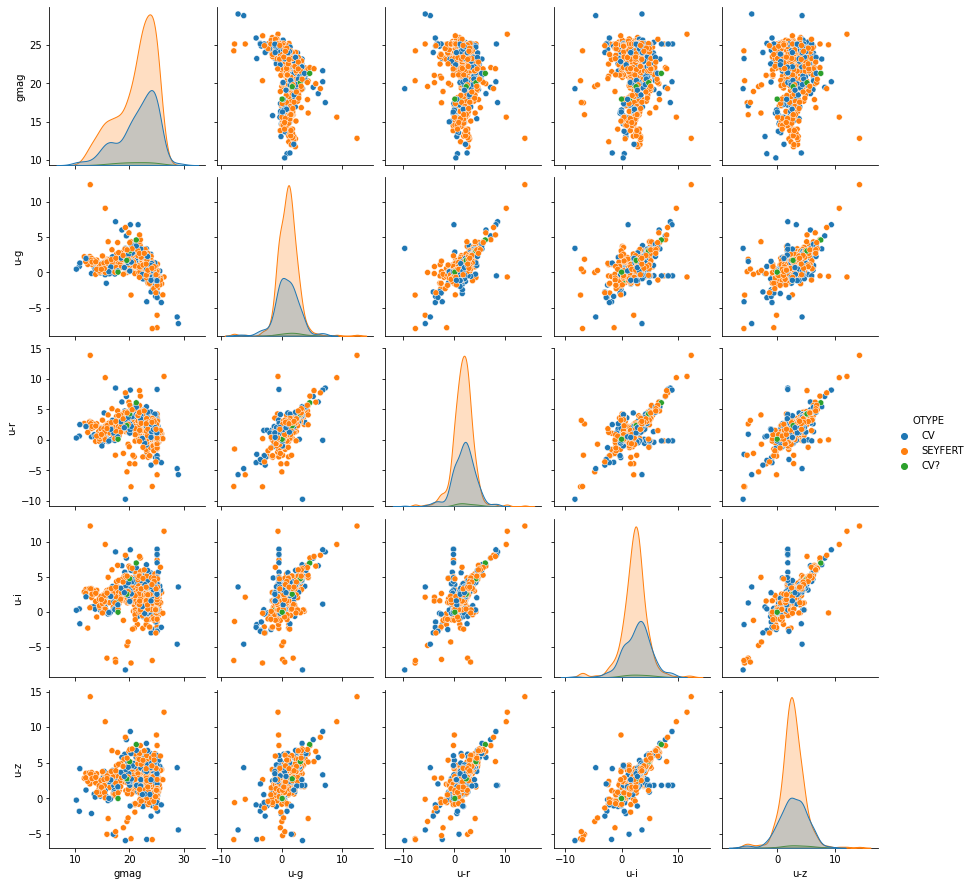

In [99]:
sns.pairplot(tab_merge.iloc[ind],hue='OTYPE',vars=new_col,diag_kind="kde")